In [365]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('2010.csv')
data.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     100 non-null    int64 
 1   title      100 non-null    object
 2   artist     100 non-null    object
 3   top genre  100 non-null    object
 4   year       100 non-null    int64 
 5   bpm        100 non-null    int64 
 6   nrgy       100 non-null    int64 
 7   dnce       100 non-null    int64 
 8   dB         100 non-null    int64 
 9   live       100 non-null    int64 
 10  val        100 non-null    int64 
 11  dur        100 non-null    int64 
 12  acous      100 non-null    int64 
 13  spch       100 non-null    int64 
 14  pop        100 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 11.8+ KB


In [367]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
data['title']=a.fit_transform(data['title'])
data.sort_values(by=['pop'],ascending=False,ignore_index=True)

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,96,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,1,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,46,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,61,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,99,Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,71,Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,20,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,9,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,74,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [368]:
data['top genre'].value_counts()

dance pop                    39
big room                     10
pop                           6
canadian pop                  6
dfw rap                       5
electropop                    4
boy band                      4
electro house                 2
brostep                       2
atl hip hop                   2
canadian contemporary r&b     2
canadian hip hop              2
modern rock                   2
neo mellow                    2
celtic rock                   1
country rap                   1
aussietronica                 1
emo rap                       1
electronic trap               1
australian pop                1
conscious hip hop             1
complextro                    1
edm                           1
irish pop                     1
indie poptimism               1
alternative r&b               1
Name: top genre, dtype: int64

In [369]:
genre=[]
for i in range(100):
    if 'pop' in data['top genre'][i]:
        genre.append('pop')
    elif ('rap'  in data['top genre'][i]) or ('trap'  in data['top genre'][i]) or ('hip hop'  in data['top genre'][i]):
        genre.append('rap')
    elif 'r&b' in data['top genre'][i]:
        genre.append('r&b')   
    elif 'rock' in data['top genre'][i]:
        genre.append('rock')  
    elif ('tro' in data['top genre'][i]) or ('edm'  in data['top genre'][i]):
        genre.append('electro') 
    else :
        genre.append(data['top genre'][i])
data['genre'] = genre 
data['genre'].value_counts()

pop           58
rap           13
big room      10
electro        5
boy band       4
r&b            3
rock           3
brostep        2
neo mellow     2
Name: genre, dtype: int64

In [370]:
success=[]
for i in range(100):
    if (data['pop'][i])>=80:
        success.append('high')
    if 80>(data['pop'][i])>=60:
        success.append('average')
    if (data['pop'][i])<60:
        success.append('low')
print(len(success))
data['success']=success
data['success'].value_counts()

100


average    57
high       37
low         6
Name: success, dtype: int64

In [371]:
data['dB'].value_counts()

-5     25
-6     22
-4     17
-3     12
-7     11
-11     3
-9      3
-8      3
-2      2
-13     1
-10     1
Name: dB, dtype: int64

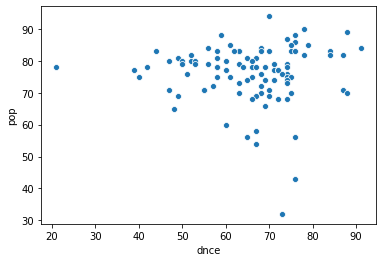

In [372]:
import matplotlib.pyplot as plt
sns.scatterplot(data['dnce'],data['pop'])
     

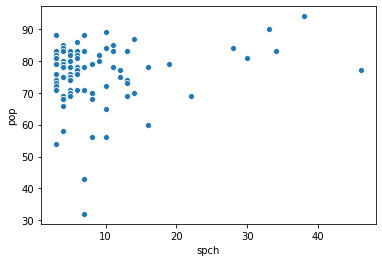

In [373]:
import matplotlib.pyplot as plt
sns.scatterplot(data['spch'],data['pop'])

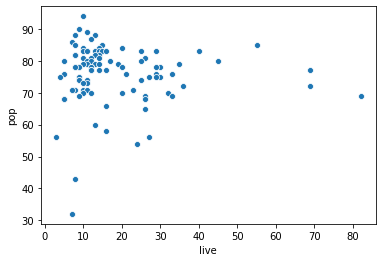

In [374]:
import matplotlib.pyplot as plt
sns.scatterplot(data['live'],data['pop'])

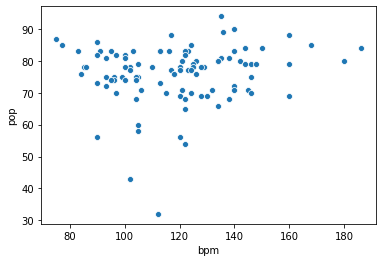

In [375]:
import matplotlib.pyplot as plt
sns.scatterplot(data['bpm'],data['pop'])

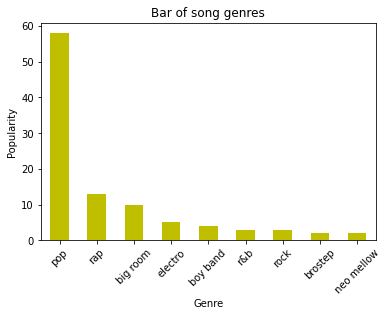

In [376]:
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Bar of song genres')
vc=data['genre'].value_counts()
vc.plot.bar(rot=45,color='y')

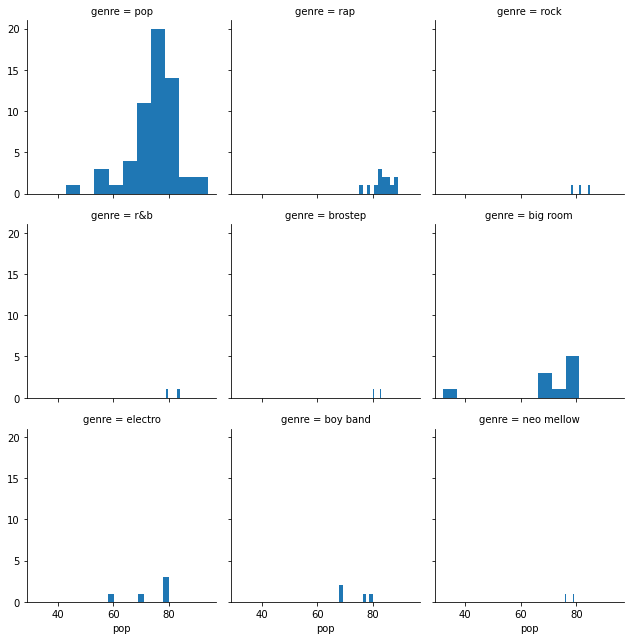

In [377]:
g=sns.FacetGrid(data,col='genre',col_wrap=3)
g.map(plt.hist,'pop')

In [378]:
data['top genre']=a.fit_transform(data['top genre'])
data['genre']=a.fit_transform(data['genre'])

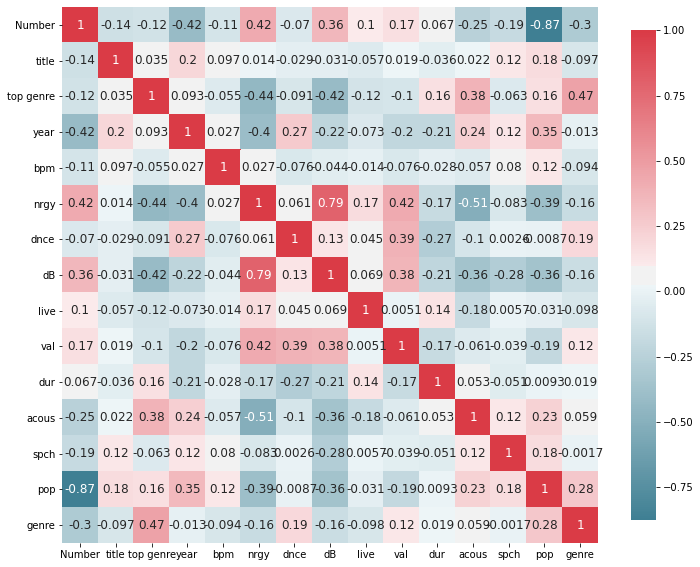

In [379]:
def plot_correlation_map( df):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( data)

In [380]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#extract x and y from our data
x=data["acous"].values[:,np.newaxis]
y=data["pop"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 47.945016489478334
R squared -0.20019301127208955


In [381]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#extract x and y from our data
x=data[["dnce",'top genre','year','dur']]  #we have more than one input
y=data["pop"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 26.95903667142012
R squared 0.053699960831587124


In [382]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= data[['genre']]
y= data["pop"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  20.647992444360376
R squared:  0.27522647426192137


In [383]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=data[["genre",'nrgy','spch','dnce','year']]
y=data["success"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.54


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [384]:
data['artist']=a.fit_transform(data['artist'])
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data[["dnce", "bpm","live", "spch"]]
y=data["success"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.5


In [391]:
data['artist']=a.fit_transform(data['artist'])
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data[["dnce", "bpm","live", "spch",'year']]
y=data["success"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.5666666666666667


In [392]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data[[ "bpm", "spch",'acous','genre']]
y=data["success"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6333333333333333


In [394]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['bpm', 'spch', 'acous']] #features
y=data['success']  #target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

Accuracy: 1.0
score:1.0


In [395]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier(n_estimators=100)
scores= cross_val_score(clf,x,y,cv=3)
print('Accuracy on each fold/subseT:', scores)
print('the average accuracy is',sum(scores)/3)

Accuracy on each fold/subseT: [0.82352941 1.         0.81818182]
the average accuracy is 0.8805704099821746


In [396]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
nw=pd.read_csv('data.csv')
nw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [423]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=nw[['speechiness', 'liveness','loudness', 'energy','instrumentalness','valence','duration_ms','mode']] #features
y=nw['target']  #target
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


Accuracy: 0.7202970297029703
score:0.7202970297029703
